In [30]:
#colors
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
brown2 = '#B45419'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
teal1 = '#294839'
green1 = '#6DA08C'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#7A693B'
beige2 = '#A89677'
beige3 = '#D2CDAD'
grey1 = '#E7E7E7'
grey2 = '#D7D7D7'
grey3 = '#C6C6C6'
grey4 = '#939393'
blue1 = '#3EA1C0'

# Define a custom color dictionary for consistent colors
custom_colors = {
    "Biomass": "#0c6013",
    "Hydropower": teal4,
    "Hydro": teal4,
    "Natural Gas": brown2,
    "Natural gas": brown2,
    "Diesel and HFO": beige2,
    "Oil": beige2,
    "Solar Pv": "#f9d002",
    "Wind": teal2,
    "Coal": "#707070",
    "Biofuels": "#06540d",
    "Kerosene": grey4,
    "Electricity": yellow,
    "Charcoal": brown2,
    "Gas": beige1,
    "Other": teal1,
    "Geothermal": teal3,
}


Graph on population with primary reliance cooking technology, in millions (both urban and rural)

<Figure size 1200x800 with 0 Axes>

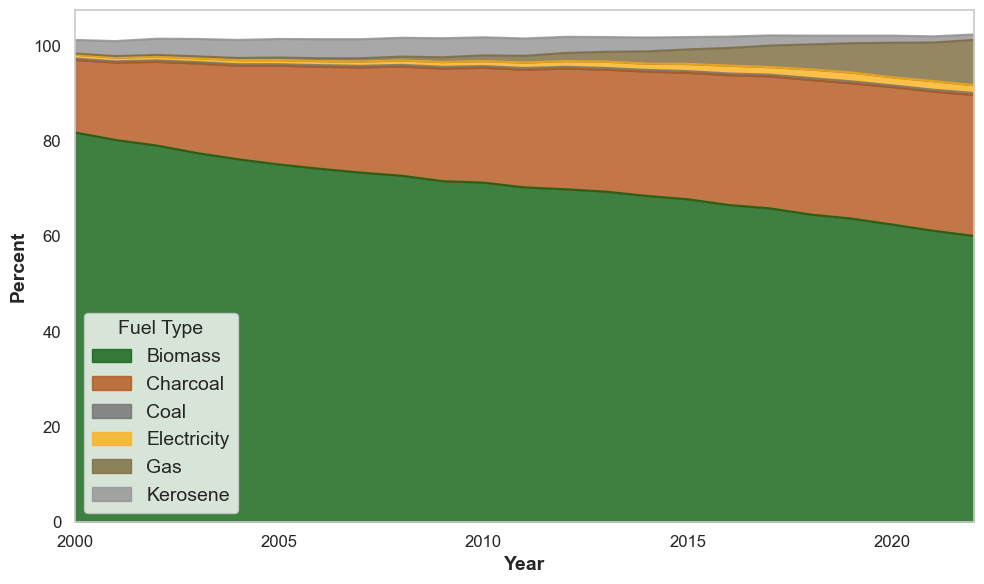

In [17]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filepath to the CSV file
file_path = r"C:/Users/hie/Graphs/% population with reliance on cooking 2000-2022, WHO.xlsx"


data = pd.read_excel(file_path)


# Pivot the data to make it suitable for plotting
pivot_data = data.pivot(index='Year', columns='Fuel Type', values='Proportion of population with primary reliance on fuels and technologies for cooking, by fuel type (%)')






plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

pivot_data.plot(kind='area', color=[custom_colors[col] for col in pivot_data.columns], alpha=0.8, figsize=(10, 6))

plt.title("", fontsize=12)
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Percent", fontsize=14, fontweight='bold')
# Customize the legend
plt.legend(
    title="Fuel Type",  # Add a title to the legend
    title_fontsize=14,         # Set the font size for the legend title
    fontsize=14,               # Set the font size for the legend labels
    loc="lower left",          # Position the legend in the upper left corner
    #bbox_to_anchor=(1.05, 1),  # Place the legend outside the plot
    frameon=True,              # Add a frame around the legend
    shadow=False,               # Add a shadow effect to the legend
    fancybox=True              # Use rounded corners for the legend box
)
plt.xlim(2000,2022)
plt.xticks(range(2000,2022,5),fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)


plt.tight_layout()
plt.show()

Projected trends of access to electricity and clean cooking


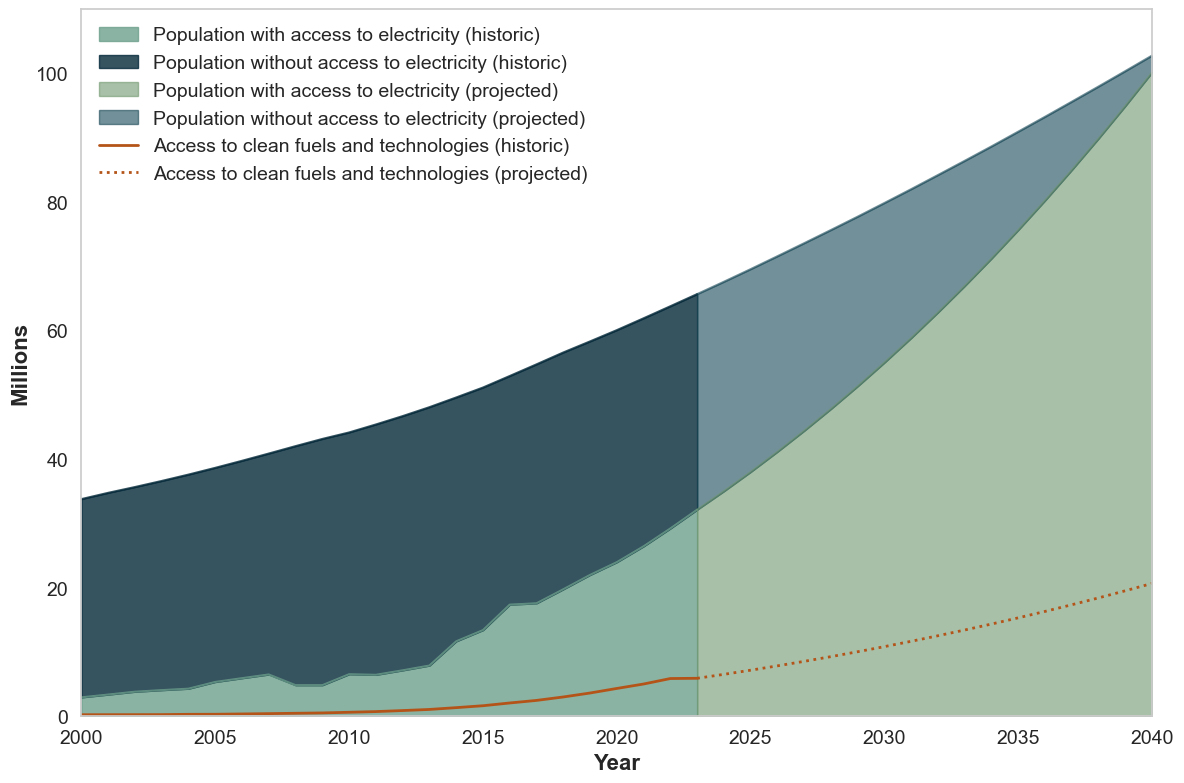

In [24]:

# Filepath to the Excel file
file = r"C:/Users/hie/Graphs/World Bank indicators_access to electricity.xlsx"

# Load the Excel file into a DataFrame
datas = pd.read_excel(file, sheet_name='Data')

# Separate historic and projected data
historic_data = datas[datas['Year'] <= 2023]
projected_data = datas[datas['Year'] > 2022]

# Prepare data for stacked plot
stacked_data_historic = historic_data[['Year', 
                                       'Population with access to electricity (in millions)', 
                                       'Population without access to electricity (in millions)']].set_index('Year')

stacked_data_projected = projected_data[['Year', 
                                         'Population with access to electricity (in millions)', 
                                         'Population without access to electricity (in millions)']].set_index('Year')

# Rename columns to include "(historic)" or "(projected)"
stacked_data_historic = stacked_data_historic.rename(columns={
    'Population with access to electricity (in millions)': 'Population with access to electricity (historic)',
    'Population without access to electricity (in millions)': 'Population without access to electricity (historic)'
})

stacked_data_projected = stacked_data_projected.rename(columns={
    'Population with access to electricity (in millions)': 'Population with access to electricity (projected)',
    'Population without access to electricity (in millions)': 'Population without access to electricity (projected)'
})

# Plot the stacked area plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Stacked area plot for electricity access (historic data)
stacked_data_historic.plot(kind='area', stacked=True, alpha=0.8, color=['#6DA08C','#032838'], ax=plt.gca(), label=['Historic: With Access', 'Historic: Without Access'])

# Stacked area plot for electricity access (projected data, slightly different shades)
stacked_data_projected.plot(kind='area', stacked=True, alpha=0.6, color=['#6E966E','#154655'], ax=plt.gca(), label=['Projected: With Access', 'Projected: Without Access'])

# Overlay line plot for clean cooking access (historic data)
plt.plot(historic_data['Year'], 
         historic_data['Access to clean fuels and technologies for cooking (in millions)'], 
         color='#B45419', linewidth=2, label='Access to clean fuels and technologies (historic)')

# Overlay line plot for clean cooking access (projected data)
plt.plot(projected_data['Year'], 
         projected_data['Access to clean fuels and technologies for cooking (in millions)'], 
         color='#B45419', linewidth=2, linestyle='dotted', label='Access to clean fuels and technologies (projected)')

# Customize the plot
plt.title("", fontsize=16)
plt.xlabel("Year", fontsize=16,fontweight='bold')
plt.ylabel("Millions", fontsize=16,fontweight='bold')
plt.xlim(2000, 2040)
plt.ylim(0,110)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
# Add a legend
plt.legend(
    title="", 
    title_fontsize=14, 
    fontsize=14, 
    loc="upper left", 
    #bbox_to_anchor=(1.05, 1), 
    frameon=False, 
    shadow=False, 
    fancybox=True,
    #fontweight='bold'
)

# Show the plot
plt.tight_layout()
plt.show()

Power mix- grid connected. Source: Energy Compact which derives the data from Tanesco


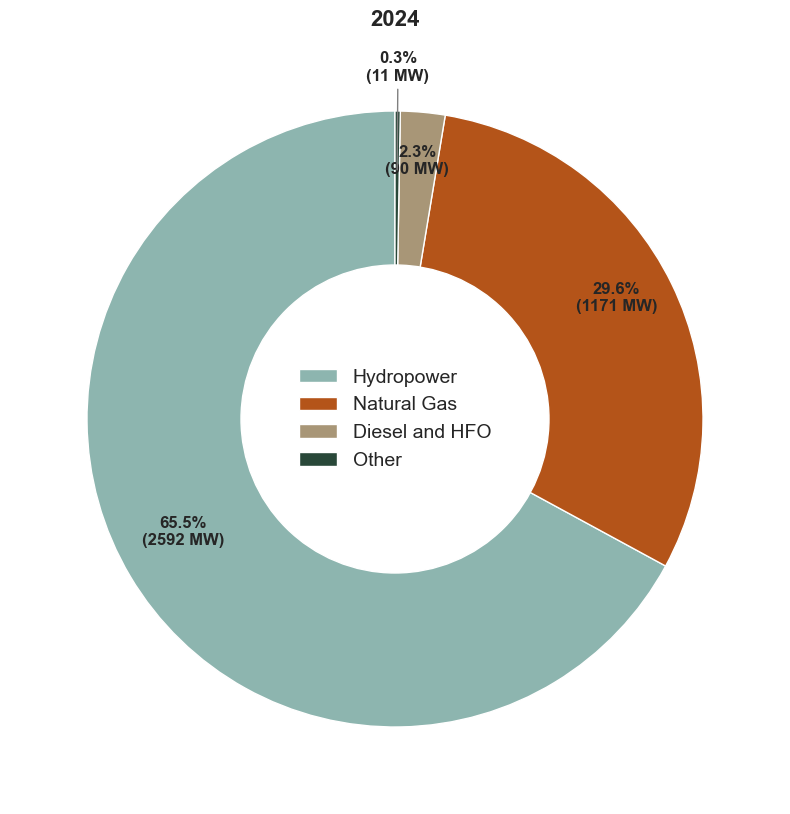

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

MW = {'Hydropower': 2652.00, 
      'Natural Gas': 1198.82, 
      'Diesel and HFO': 92.37, 
      'Other': 13.9,
      #'Solar Pv': 3.4, 
      }

percent = {'Hydropower': 65.51, 
           'Natural Gas': 29.6, 
           'Diesel and HFO': 2.28, 
           'Other': 0.27,
           #'Solar Pv': 0.01,
           }

# Create a function to format the labels
def autopct_format(pct, all_values):
    absolute = int(round(pct / 100.0 * sum(all_values)))
    return f"{pct:.1f}%\n({absolute} MW)"

# Extract labels, sizes, and MW values
labels = list(percent.keys())
sizes = list(percent.values())
MW_values = list(MW.values())


labels.rename(columns={"Natural Gas": "CCGT"})

# Create the pie chart
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(
    sizes,  
    autopct=None,  # Disable automatic percentage display
    startangle=90,
    textprops={'fontsize': 12},  
    colors=[custom_colors[label] for label in labels],  # Use custom colors          
    pctdistance=0.8,
    
)


# Add percentage and MW values for each slice
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.8 * np.cos(np.radians(angle))
    y = 0.8 * np.sin(np.radians(angle))
    
    if labels[i] in ['Hydropower', 'Natural Gas', 'Diesel and HFO']:
        # Place values inside the pie chart for Hydropower and Natural Gas
        plt.text(x, y, autopct_format(sizes[i], MW_values), ha='center', fontsize=12, fontweight='bold')
    else:
        # Place values outside the pie chart for Biomass 
        x_label = 1.1 * np.cos(np.radians(angle))
        y_label = 1.1 * np.sin(np.radians(angle))
        plt.annotate(
            autopct_format(sizes[i], MW_values), 
            xy=(x, y), 
            xytext=(x_label, y_label),
            arrowprops={'arrowstyle': "-", 'color': 'grey'},
            fontsize=12,
            fontweight='bold',
            ha='center'
 )

centre_circle = plt.Circle((0, 0), 0.5, fc='white')
plt.gca().add_artist(centre_circle)
# Add legend with all labels
plt.legend(labels=labels, loc='center', fontsize=14, frameon=False)

# Add title and display the chart
plt.title("2024", fontsize=16,  fontweight='bold')
plt.show()

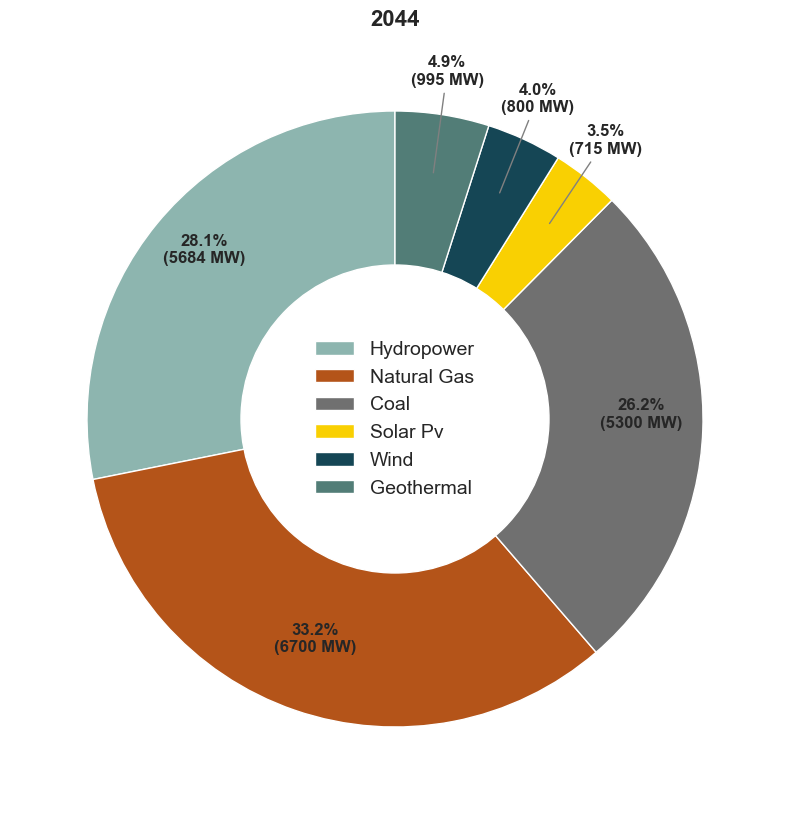

In [35]:
#furture system

import matplotlib.pyplot as plt
import numpy as np

MW = {'Hydropower': 5684, 
      'Natural Gas': 6700, 
      'Coal': 5300,
      'Solar Pv': 715,
      'Wind': 800, 
      'Geothermal': 995
      }

# Calculate total
total = sum(MW.values())

# Calculate percentages
percent = {key: (value / total) * 100 for key, value in MW.items()}

# Create a function to format the labels
def autopct_format(pct, all_values):
    absolute = int(round(pct / 100.0 * sum(all_values)))
    return f"{pct:.1f}%\n({absolute} MW)"

# Extract labels, sizes, and MW values
labels = list(percent.keys())
sizes = list(percent.values())
MW_values = list(MW.values())




# Create the pie chart
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(
    sizes,  
    autopct=None,  # Disable automatic percentage display
    startangle=90,
    textprops={'fontsize': 12},  
    colors=[custom_colors[label] for label in labels],  # Use custom colors          
    pctdistance=0.8,
    
)


# Add percentage and MW values for each slice
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.8 * np.cos(np.radians(angle))
    y = 0.8 * np.sin(np.radians(angle))
    
    if labels[i] in ['Hydropower', 'Natural Gas', 'Diesel and HFO', 'Coal']:
        # Place values inside the pie chart for Hydropower and Natural Gas
        plt.text(x, y, autopct_format(sizes[i], MW_values), ha='center', fontsize=12, fontweight='bold')
    else:
        # Place values outside the pie chart for Biomass 
        x_label = 1.1 * np.cos(np.radians(angle))
        y_label = 1.1 * np.sin(np.radians(angle))
        plt.annotate(
            autopct_format(sizes[i], MW_values), 
            xy=(x, y), 
            xytext=(x_label, y_label),
            arrowprops={'arrowstyle': "-", 'color': 'grey'},
            fontsize=12,
            fontweight='bold',
            ha='center'
 )

centre_circle = plt.Circle((0, 0), 0.5, fc='white')
plt.gca().add_artist(centre_circle)
# Add legend with all labels
plt.legend(labels=labels, loc='center', fontsize=14, frameon=False)

# Add title and display the chart
plt.title("2044", fontsize=16,  fontweight='bold')
plt.show()

Generation trends from IEA https://www.iea.org/countries/tanzania/electricity

<Figure size 1200x800 with 0 Axes>

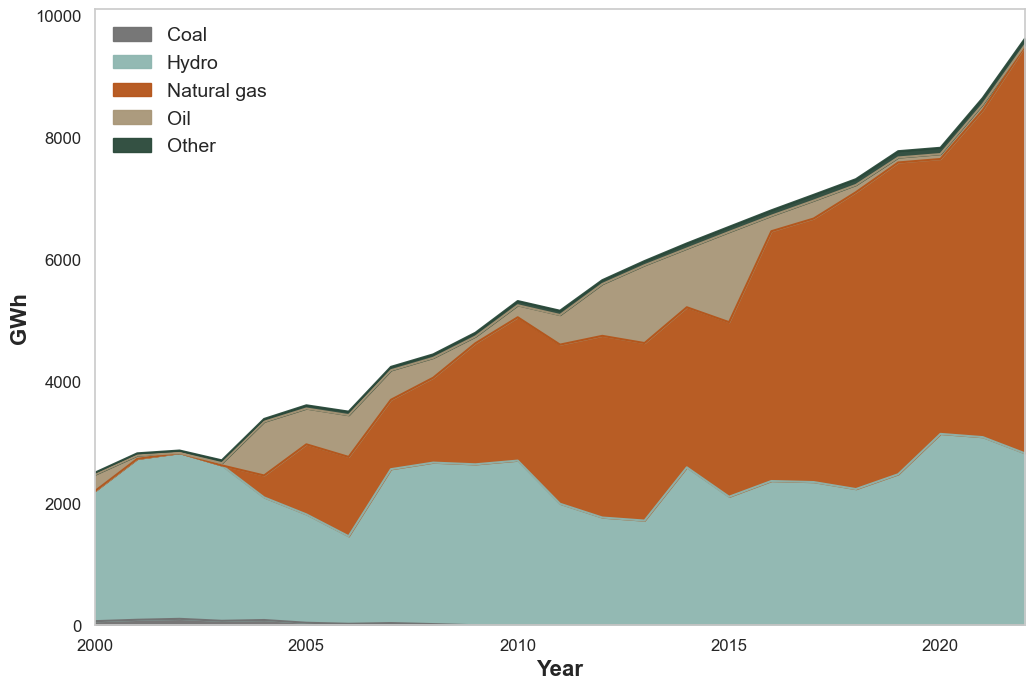

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filepath to the CSV file
file_path = r"C:\Users\hie\Graphs\International Energy Agency - electricity generation sources in Tanzania.csv"

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path, sep=',')

# Ensure the data is sorted by year
data = data.sort_values(by="Year")

# Pivot the data to prepare it for a stacked area plot
pivot_data = data.pivot(index="Year", columns="electricity generation sources in Tanzania", values="Value")



# Plot the stacked area chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

pivot_data.plot(kind="area", stacked=True,  color=[custom_colors[col] for col in pivot_data.columns], alpha=0.95,figsize=(12, 8))

# Customize the plot
plt.title("", fontsize=16)
plt.xlabel("Year", fontsize=16, fontweight='bold')
plt.ylabel("GWh", fontsize=16,fontweight='bold')
# Customize the legend
plt.legend(
    title="",
    title_fontsize=16,
    fontsize=14,
    loc="upper left",
    #bbox_to_anchor=(1.05, 1),  # Place the legend outside the plot
    frameon=False,
    #shadow=True,
    fancybox=True
)
plt.xlim(2000, 2022)
plt.xticks(range(2000, 2023, 5), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

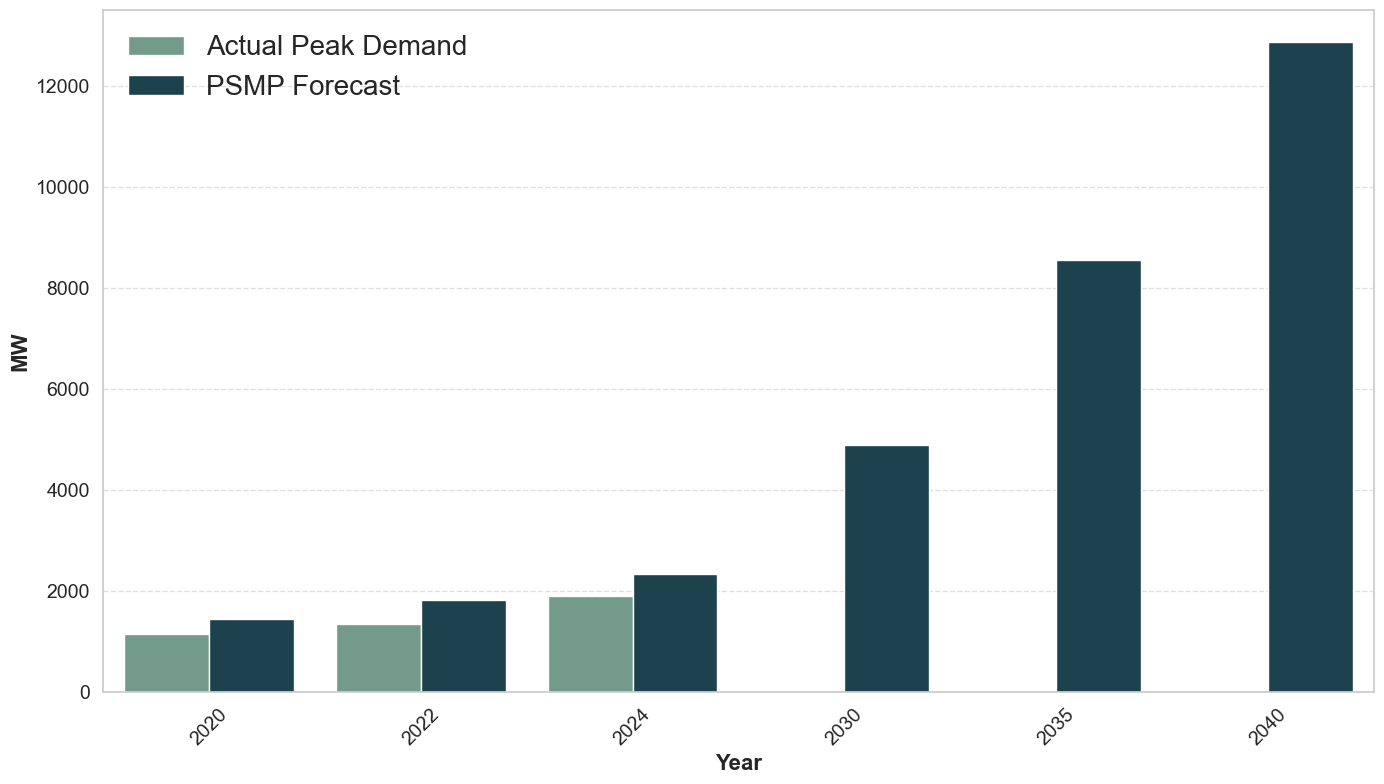

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Define the data
actual = {
    "Year": [ 2020,  2022,  2024],  #2018,  1117,
    "Actual Peak Demand": [ 1152, 1341, 1889]
    
}
psmp= { 
    "Year": [2020, 2022, 2024, 2030, 2035, 2040],
     "PSMP Forecast": [1435, 1809,2329,4878, 8554, 12854]
}
# Convert to DataFrame
actual_df = pd.DataFrame(actual)
psmp_df=pd.DataFrame(psmp)
df = pd.merge(actual_df, psmp_df, on="Year", how="outer")
#Melt the DataFrame to long format for plotting
df_melted = pd.melt(df, id_vars=["Year"], value_vars=["Actual Peak Demand", "PSMP Forecast"],
                    var_name="Type", value_name="Peak Demand")

# Plot
plt.figure(figsize=(14, 8))
palette = {"Actual Peak Demand": "#6DA08C", "PSMP Forecast": "#154655"}

# Create grouped barplot
sns.barplot(x="Year", y="Peak Demand", hue="Type", data=df_melted, palette=palette)

# Customize plot
plt.title("", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=16, fontweight='bold')
plt.ylabel("MW", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="", fontsize=20, loc='upper left', frameon=False, shadow=False, fancybox=True)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

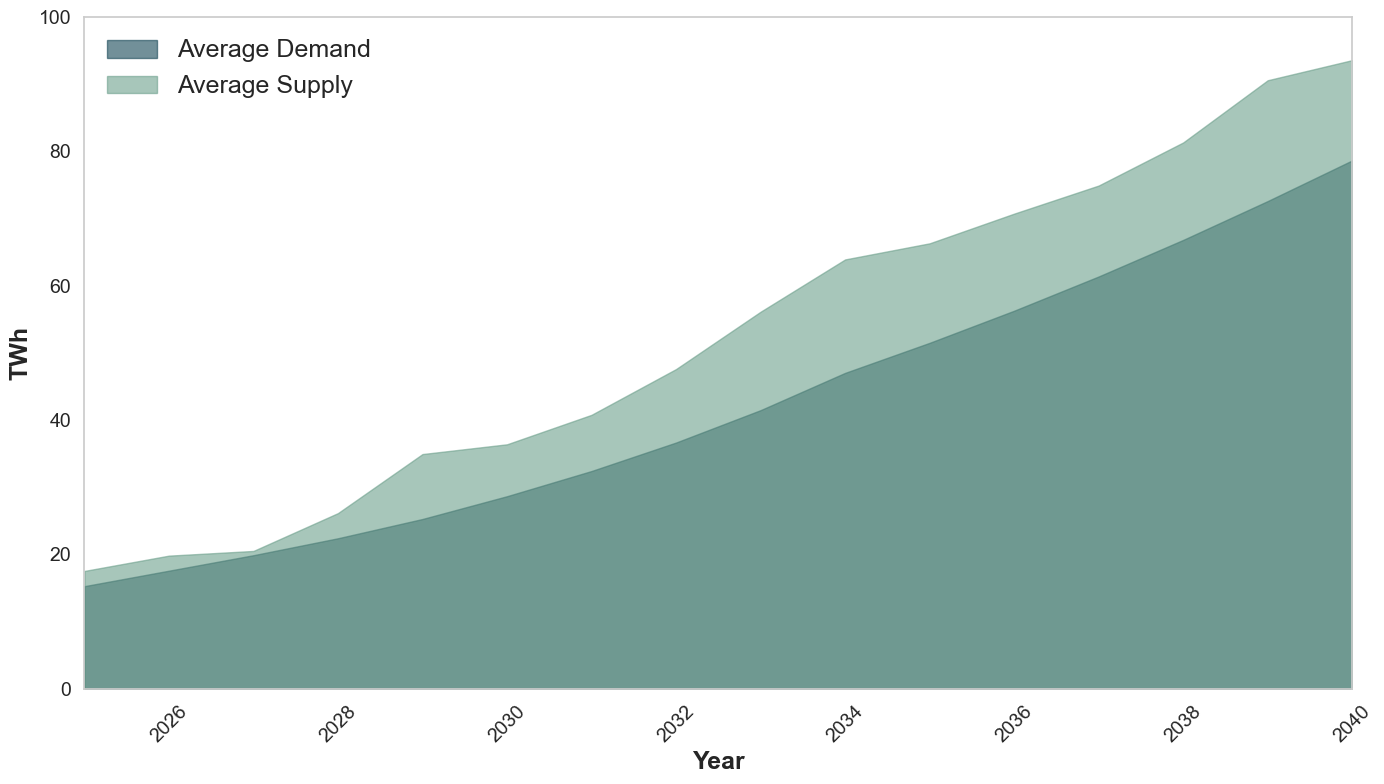

In [35]:
#future supply/demand balance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Filepath to the CSV file
file_path = r"C:\Users\hie\Graphs\supplydemand.xlsx"

data=pd.read_excel(file_path)

#palette = {"Historic": "#6DA08C", "Forecasted": '#154655'


# Select relevant columns and set the index
stacked_data = data[['Year', 'Average demand (GWh)', 'Average supply (GWh)']].set_index('Year')
# Convert values from GWh to TWh
stacked_data['Average demand (GWh)'] = stacked_data['Average demand (GWh)'] / 1000
stacked_data['Average supply (GWh)'] = stacked_data['Average supply (GWh)'] / 1000

# Rename columns for clarity
stacked_data = stacked_data.rename(columns={
    'Average demand (GWh)': 'Average Demand',
    'Average supply (GWh)': 'Average Supply'
})
# Plot the data
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Fill the area for Average Demand
plt.fill_between(
    stacked_data.index,
    stacked_data['Average Demand'],
    color="#154655",
    alpha=0.6,
    label="Average Demand"
)

# Fill the area for Average Supply
plt.fill_between(
    stacked_data.index,
    stacked_data['Average Supply'],
    color="#6DA08C",
    alpha=0.6,
    label="Average Supply"
)

# Customize the plot
plt.title("", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=18, fontweight='bold')
plt.ylabel("TWh", fontsize=18, fontweight='bold')

# Customize the legend
plt.legend(
    title="",
    title_fontsize=12,
    fontsize=18,
    loc="upper left",
    frameon=False,
    fancybox=True
)

# Customize ticks and grid
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.xlim(2025, 2040)
plt.ylim(0, 100)
# Show the plot
plt.tight_layout()
plt.show()